# Tasks

### Importing libraries

In [91]:
# import Python Data Analysis Library
import pandas as pd
# import Scikit-Learn Machine Learning Library, contains sample datasets
import sklearn as skl
# import NumPy to manipulate numerical arrays
import numpy as np
# import Matplotlib.PyPlot for plotting
import matplotlib.pyplot as plt

# Check version numbers of these libraries, for compatibility. 
# If sklearn <1.6.0, must import datasets library explicitly.
# Ref: release notes for Scikit-Learn v1.6 (Dec 2024)
# https://scikit-learn.org/stable/whats_new/v1.6.html#version-1-6-0
print("pandas version", pd.__version__, "sklearn version", skl.__version__)

pandas version 2.2.3 sklearn version 1.6.1


### Library documentation
- [pandas](https://pandas.pydata.org/docs/index.html)
- [sklearn](https://scikit-learn.org/stable/index.html)

## Task 1: Source the Data Set
### Task Description: 
>Import the Iris data set from the `sklearn.datasets` module.  
>Explain, in your own words, what the `load_iris()` function returns.

The `load_iris()` function returns the contents of the [1936 Fisher iris dataset][iris] as a data structure composed of rows and columns, with the values parsed correctly.

The dataset is a collection of measurements of the sepals and petals of three different related species of iris flower. The dataset consists of measurements of 150 plants, 50 each of three species. Each plant has four measurements - sepal length, sepal width, petal length, and petal width, all in cm. The original data was collected by botanist Edgar Anderson (1936), and used by Fisher (1936) to demonstrate his method of statistical analysis. 

The [documentation][1] for `load_iris()`] indicates that the version of the iris dataset in the UCL Machine Learning Repository contains two wrong data points, when compared with Fisher's original paper. The version of the dataset fetched by `load_iris()` has been corrected.

[1]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
[iris]: https://archive.ics.uci.edu/dataset/53/iris

Anderson, E. (1936). The species problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457. https://doi.org/10.2307/2394164  
Fisher, R. A. (1936). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x


In [92]:
# Load the dataset.
dataset = skl.datasets.load_iris()
# Finding the type of what has been returned
print(f"The load_iris function returned an item of type {type(dataset)}")

The load_iris function returned an item of type <class 'sklearn.utils._bunch.Bunch'>


The `load_iris` function returns a data structure of type Bunch. The [scikit-learn documentation for Bunch][bunch] indicates this is a dictionary-like object, so it contains key:value pairs; and Bunch also has the ability to access the values both by key and by attribute.

[bunch]:https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [93]:
# Demonstrating that values can be accessed both by key and by attribute 

# Looking at the values for target_names, accessing them by key
print(f"Target names accessed by key: {dataset["target_names"]}")
# Looking at the values for target_names, accessing them by attribute
print(f"Target names accessed by attribute: {dataset.target_names}")

Target names accessed by key: ['setosa' 'versicolor' 'virginica']
Target names accessed by attribute: ['setosa' 'versicolor' 'virginica']


In [94]:
# Looking at the dataset keys
print("The keys of the Iris dataset are:", dataset.keys(), "\n")

# Checking the type of each part of the dataset
print("Key \t\t\t Type stored")

for key, value in dataset.items():

    # ref for Python F-string formatting:
    # https://docs.python.org/3/library/string.html#formatspec
    print(f"{key:24} {type(value)}")

The keys of the Iris dataset are: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

Key 			 Type stored
data                     <class 'numpy.ndarray'>
target                   <class 'numpy.ndarray'>
frame                    <class 'NoneType'>
target_names             <class 'numpy.ndarray'>
DESCR                    <class 'str'>
feature_names            <class 'list'>
filename                 <class 'str'>
data_module              <class 'str'>


- `data` is an array of measurements taken of each sample flower in this dataset
- `target` is an array containing integers that represent the species of each sample flower
- `frame` (optional) The dataset as a Pandas dataframe (Not present in this dataset as it was not requested when `load_iris()` was called) 
- `target_names` is a list of strings containing the name of each species of iris (i.e. the names of the targets)
- `DESCR` is a few paragraphs describing this dataset, its characteristics, basic statistics, and history
- `feature_names` is a list of the names of the measurements taken of each sample flower (i.e. each feature in `data`)
- `filename` is the name of the file where the data are stored (i.e. where the data was sourced from by `load_iris()`)
- `data_module` is the module wher the data file is stored.

Documentation for the `load_iris()` module is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [95]:
# Looking at the targets
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
# Looking at the description of the dataset.
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Task 2: Explore the Data Structure

### Task Description
>Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [97]:
# Printing the shape of the data set
# Documentation for numpy.shape():
# https://numpy.org/doc/stable/reference/generated/numpy.shape.html
print(f"The NumPy shape() function returns a tuple representing the dimensions of the data array: {dataset["data"].shape}")

print(f"The data array has {dataset['data'].shape[0]} samples and {dataset['data'].shape[1]} features")

The NumPy shape() function returns a tuple representing the dimensions of the data array: (150, 4)
The data array has 150 samples and 4 features


In [98]:
# Looking at the data, first 5 rows
print("The first five rows of the data are:")
print(dataset["data"][:5])

# Looking at the data, last 5 rows
print("The last five rows of the data are:")
print(dataset["data"][-5:])

The first five rows of the data are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The last five rows of the data are:
[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [99]:
# Looking at the data feature names
print(dataset["feature_names"])

print("The feature names are the names of each attribute represented in the numeric data. They are:")
for name in dataset["feature_names"]:
    print(name)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The feature names are the names of each attribute represented in the numeric data. They are:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [100]:
# Looking at the target classes
print(dataset["target_names"])

print("The target classes are the names of the classes to which each set of measurements belongs \n"
"(i.e. the species of iris to which each measured flower belongs.) \nThe classes are:") 
for name in dataset["target_names"]:
    print(name)

['setosa' 'versicolor' 'virginica']
The target classes are the names of the classes to which each set of measurements belongs 
(i.e. the species of iris to which each measured flower belongs.) 
The classes are:
setosa
versicolor
virginica


## Task 3: Summarize the Data
### Task Description:
>For each feature in the dataset, calculate and display:
>- mean
>- minimum
>- maximum
>- standard deviation
>- median

In [101]:
# Get number of data samples and features
n_samples = dataset.data.shape[0]
n_features = dataset.data.shape[1]

# Count number of unique targets 
# documentations for numpy.unique:
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
n_targets = len(np.unique(dataset.target))


In [102]:
# print header line to identify each stat in output
print("Feature \t\tMean \tMin \tMax \tStDev \tMedian")

# For each feature, by index,
for feature in range(0,n_features):

    # Get name of feature
    name = dataset.feature_names[feature]

    # Get stats for feature using NumPy statistics methods, documented here:
    # https://numpy.org/doc/2.2/reference/routines.statistics.html
    mean = np.mean(dataset.data[:,feature])
    min = np.min(dataset.data[:,feature])
    max = np.max(dataset.data[:,feature])
    stdev = np.std(dataset.data[:,feature])
    median = np.median(dataset.data[:,feature])

    # Print out stats for feature
    print(f"{name}\t{mean:.2f}\t{min}\t{max}\t{stdev:.2f}\t{median}")

Feature 		Mean 	Min 	Max 	StDev 	Median
sepal length (cm)	5.84	4.3	7.9	0.83	5.8
sepal width (cm)	3.06	2.0	4.4	0.43	3.0
petal length (cm)	3.76	1.0	6.9	1.76	4.35
petal width (cm)	1.20	0.1	2.5	0.76	1.3


## Task 4: Visualize Features
### Task Description:
>Plot histograms for each feature using matplotlib.
>Add appropriate titles and axis labels.

Text(0.5, 0.98, 'Feature histograms with independent bins')

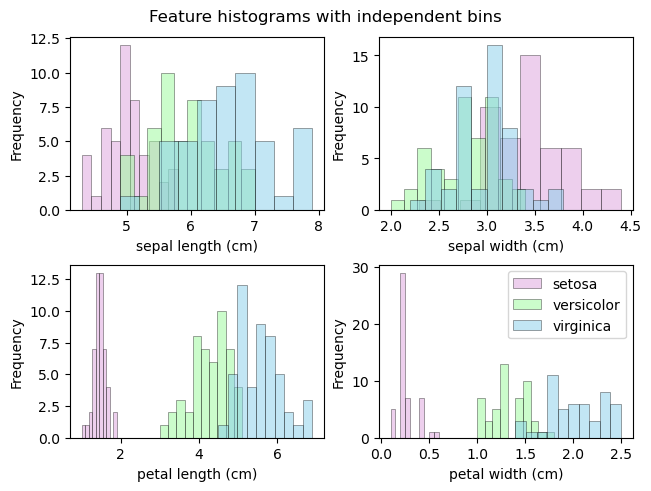

In [139]:
# Set up 2 x 2 subplots, set layout = constrained to keep axis labels
# from clashing with neighbouring plots.
# Ref: https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
fig, ax = plt.subplots(2, 2, layout = "constrained") 

# Make a list of colours so that each species of iris can be displayed 
# in a different colour.
# Color names from
# https://htmlcolorcodes.com/color-names/
target_colours = ["plum", "palegreen", "skyblue"]

# For each feature, by index (i.e. feature will range from 0 to 3)
for feature in range(0,n_features):

    # set which subplot we are working on, counting from 1
    plt.subplot(2,2,feature + 1)

    # Get name of feature
    name = dataset.feature_names[feature]
    
    for species in range(n_targets):
        # Plot the histogram
        plt.hist(
            dataset.data[dataset.target==species,feature], 
            color = target_colours[species],
            linewidth=0.5, 
            edgecolor="black",
            alpha = 0.5,
            label = dataset.target_names[species]
        )

    # Set the x-axis label to the feature name
    plt.xlabel(name)

    # Set the y-axis label represent frequency in the dataset
    plt.ylabel("Frequency")

# All plots use same colours, so calling legend once, outside the loop
plt.legend();

# Set overall title
fig.suptitle("Feature histograms with independent bins")

We can see from these histograms that there is a lot of overlap between targets when looking at sepal length and sepal width, and conversely, targets are much less overlapped when looking at petal length and petael width. 

For petal length and petal width, the Setosa samples are clearly separated from the others, while the Versicolor and Viriginica samples overlap slightly.

Text(0.5, 0.98, 'Feature histograms with aligned bins')

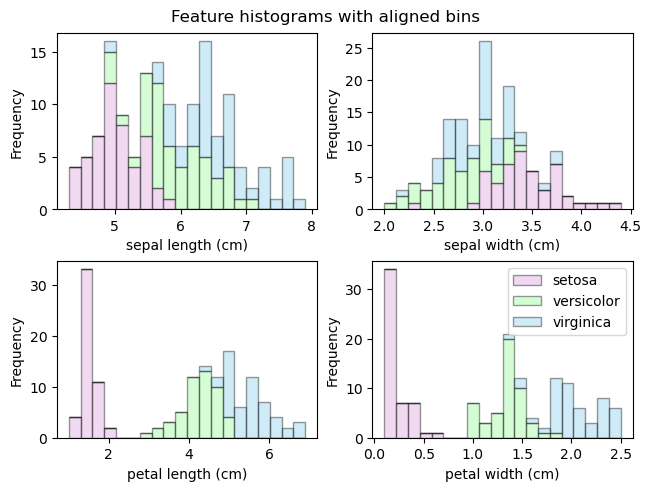

In [141]:
# Playing with alternative histograms

# Set up 2 x 2 subplots, set layout = constrained to keep axis labels
# from clashing with neighbouring plots.
# Ref: https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
fig, ax = plt.subplots(2, 2, layout = "constrained") 

# Make a list of colours so that each species of iris can be displayed 
# in a different colour.
# Color names from
# https://htmlcolorcodes.com/color-names/
target_colours = ["plum", "palegreen", "skyblue"]


# For each feature, by index (i.e. feature will range from 0 to 3)
for feature in range(0,n_features):

    data_to_plot = [
        dataset.data[dataset.target==0, feature],
        dataset.data[dataset.target==1, feature],
        dataset.data[dataset.target==2, feature]
    ]

    # set which subplot we are working on, counting from 1
    plt.subplot(2,2,feature + 1)

    # Get name of feature
    name = dataset.feature_names[feature]

    # Set number of histogram bins to 
    # the square root of the number of observations. (This should always be the 
    # same number for a rectangular array of data.)
    nbins = 20

    # Plot the histogram
    plt.hist(      
        data_to_plot, 
        bins = nbins,
        color = target_colours,
        histtype='bar',
        fill = True, 
        stacked=True,
        linewidth=1, 
        edgecolor= "black",
        alpha = 0.4,
        label = dataset.target_names
    )

    # Set the x-axis label to the feature name
    plt.xlabel(name)

    # Set the y-axis label represent frequency in the dataset
    plt.ylabel("Frequency")

# All plots use same colours, so calling legend once, outside the loop
plt.legend();

# Set overall title
fig.suptitle("Feature histograms with aligned bins")

## Task 5: Investigate Relationships
Task Description:
>Choose any two features from the data set and create a scatter plot of them.  
>Color-code the three different classes of the scatter plot points.

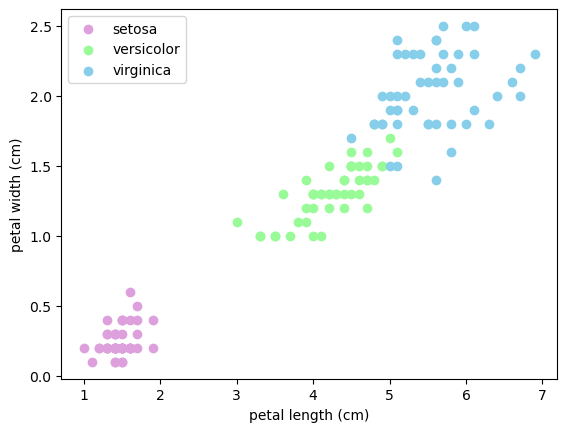

In [104]:
# Choose which features to plot by their index in the data, 
# i.e. sepal length is 0, sepal width is 1, 
# petal length is 2, petal width is 3
x = 2
y = 3

# Adapted from previous code cell for histogram plots
for species in range(n_targets):
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        color = target_colours[species],
        label = dataset.target_names[species]
    )

plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])
plt.legend();

## Task 6: Analyze Relationship
>Use `numpy.polyfit` to add a regression line to the scatter plot from Task 5.

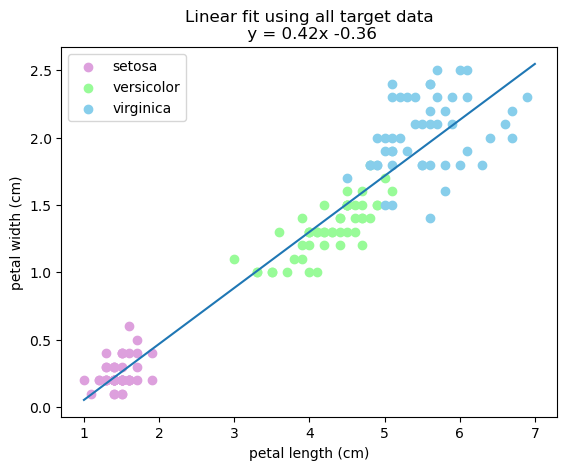

In [105]:
# Calculate the coefficients of a linear fit to the scatter plot above
# using data from all targets
# Documentation for numpy.polyfit:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
slope, intercept = np.polyfit(dataset.data[:,2], dataset.data[:,3], 1)

# Generate a range of x-values and calculate the  corresponding y-values 
# using the linear fit
linfit_x_values = np.arange(1,7,0.001)
linfit_y_values = (linfit_x_values * slope) + intercept

# Copied from previous code cell for scatter plots
for species in range(n_targets):
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        color = target_colours[species],
        label = dataset.target_names[species]
    )
plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])

plt.legend();

# Plot the linear fit calculated above
plt.plot(linfit_x_values, linfit_y_values)

# add linear fit equation to the title - note the string format for the 
# intercept displays the + or - sign whether the value of the intercept is 
# positive or negative, so I don't need to have the sign as a string literal.  
# (from https://docs.python.org/3/library/string.html#formatspec)
plt.title(f"Linear fit using all target data\n y = {slope:.2}x {intercept:+.2}");


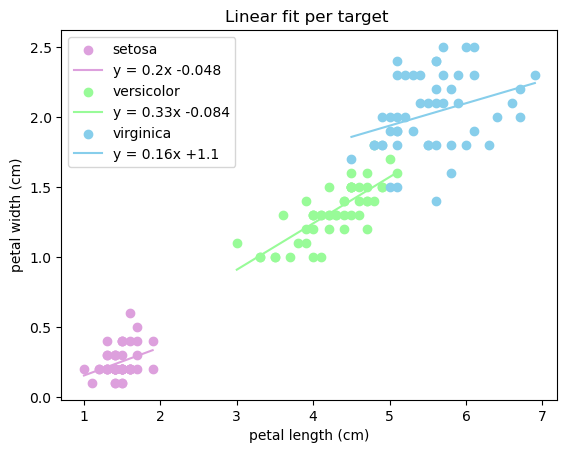

In [106]:

# Calculate the coefficients of a linear fit to the scatter plot above
# using data from each target separately
# Documentation for numpy.polyfit:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html


# Copied from previous code cell for scatter plots
# For each target, by index,
for species in range(n_targets):

    # Calculate the linear fit for this target's data
    slope, intercept = np.polyfit(
        dataset.data[dataset.target==species,x], 
        dataset.data[dataset.target==species,y], 
        1
    )

    # set the linear fit x-values to the lowest and highest x-values in 
    # this targets's dataset
    linfit_x_values = np.arange(
        np.min(dataset.data[dataset.target==species,x]),
        np.max(dataset.data[dataset.target==species,x]),
        0.001
        )
    
    # calculate the corresponding y-values using this linear fit
    linfit_y_values = (linfit_x_values * slope) + intercept

    # plot the scatter plot (as above)
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        color = target_colours[species],
        label = dataset.target_names[species]
    )

    # plot the linear fit in the same colour as this target's
    # scatter plot
    plt.plot(
        linfit_x_values, 
        linfit_y_values, 
        color = target_colours[species],
        label = f"y = {slope:.2}x {intercept:+.2}"    
    )

plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])

plt.legend();

plt.title("Linear fit per target ");


## Task 7: Analyze Class Distributions
>Create box-plots of the petal lengths for each of the three classes.

''

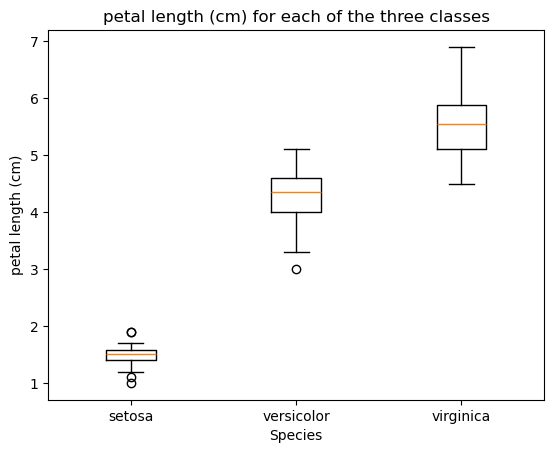

In [107]:
# Petal length has index 2 in the list of features. 
# Can change this statement to plot other features.
feature = 2

# Create a figure and an axis. 
fig, ax = plt.subplots()

# Plotting the boxplot
# Documentation for matplotlib.pyplot.boxplot:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot(
    # Input to boxplot() needs to be a 2D array, which I am creating here 
    # by extracting data[:,2] for each target
    [dataset.data[dataset.target==0, feature],
    dataset.data[dataset.target==1, feature],
    dataset.data[dataset.target==2, feature]]
)

# setting labels for the x-axis:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
ax.set_xticklabels(dataset.target_names)
plt.xlabel("Species")

# set ylabel by getting the name of this feature
plt.ylabel(dataset.feature_names[feature])

plt.title(f"{dataset.feature_names[feature]} for each of the three classes")
;


## General Reference:  
[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/datasets)  
[Markdown syntax](https://markdownguide.offshoot.io/cheat-sheet/)

## End of Notebook